In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data
from torch.utils.data import DataLoader 
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import math
import argparse
import datetime
import math
from time import time


In [2]:
def beta_linear(t):
    return t

def beta_approx(t, M):
    """
    Compute β_t = (1/M) * √(-log(1 + (e^(-M²) - 1)t))
    
    Parameters:
    -----------
    t : float or torch.Tensor
        Time parameter
    M : float or torch.Tensor
        Parameter M
        
    Returns:
    --------
    torch.Tensor
        β_t(t) value
    """
    t = torch.as_tensor(t, dtype=torch.float32)
    M_squared = torch.as_tensor(M*M, dtype=torch.float32)
    
    # For numerical stability when M² is large
    if M_squared > 20:
        # e^(-M²) ≈ 0, so (e^(-M²) - 1) ≈ -1
        inner = 1 - t
    else:
        exp_neg_M2 = torch.exp(-M_squared)
        inner = 1 + (exp_neg_M2 - 1) * t
    
    # Clamp to avoid log(0) or negative values
    inner = torch.clamp(inner, min=1e-10)
    log_term = -torch.log(inner)
    
    beta = torch.sqrt(torch.clamp(log_term, min=1e-10)) / M

    if t == 1: 
        return 1
    return beta


def beta_time_dilated(t, kappa, M):
    if t<1/2:
        return 2*kappa*t/M
    else:
        return kappa/M + (1-kappa/M)*(2*t-1)

In [3]:
ts_fine = np.linspace(0.0, 1.0, 200)

In [6]:
M = 5
kappa = 1

beta_lin = [beta_linear(t) for t in ts_fine]
beta_aprox = [beta_approx(t,M) for t in ts_fine]
beta_dilated = [beta_time_dilated(t, kappa, M) for t in ts_fine]
beta_true_k_1 = np.load("beta_d_5_k_1.npy")
beta_true_k_5 = np.load("beta_d_5_k_5.npy")


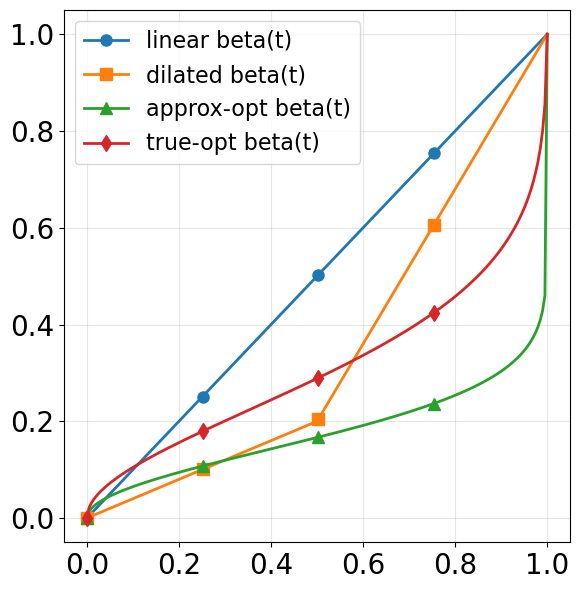

In [8]:
### show figures of alpha, beta
markers = ['o', 's', '^', 'd', 'v']
plt.figure(figsize=(6, 6))

plt.plot(ts_fine, beta_lin, label="linear beta(t)", marker=markers[0], markersize=8, markevery=50, linewidth=2)
plt.plot(ts_fine, beta_dilated, label="dilated beta(t)", marker=markers[1], markersize=8, markevery=50, linewidth=2)
plt.plot(ts_fine, beta_aprox,label="approx-opt beta(t)", marker=markers[2], markersize=8, markevery=50, linewidth=2)
plt.plot(ts_fine, beta_true_k_1, label="true-opt beta(t)", marker=markers[3], markersize=8, markevery=50, linewidth=2)
# plt.plot(ts_fine, beta_true_k_5, label="true-opt beta(t), k=5", marker=markers[4], markersize=8, markevery=50, linewidth=2)


plt.legend(fontsize=16)
plt.grid(alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size

plt.tight_layout()
plt.savefig(f"GMM-schedules-M5.pdf", dpi=300)

In [4]:
M = 20
kappa = 1

beta_lin = [beta_linear(t) for t in ts_fine]
beta_aprox = [beta_approx(t,M) for t in ts_fine]
beta_dilated = [beta_time_dilated(t, kappa, M) for t in ts_fine]
beta_true_k_1 = np.load("beta_d_20_k_1.npy")
beta_true_k_20 = np.load("beta_d_20_k_20.npy")


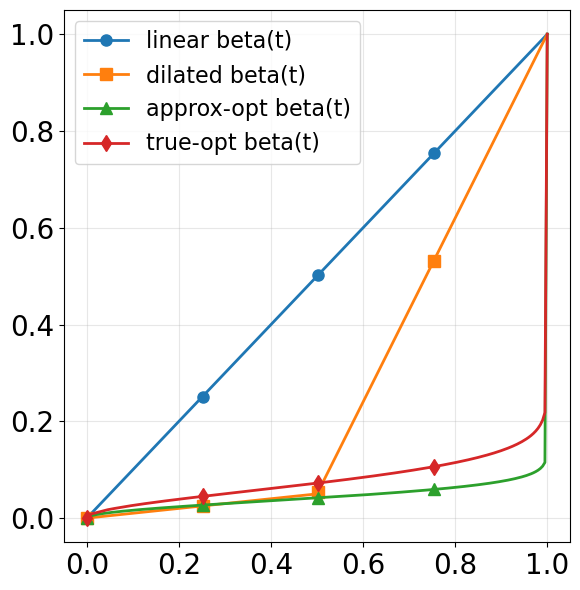

In [5]:
### show figures of alpha, beta
markers = ['o', 's', '^', 'd', 'v']
plt.figure(figsize=(6, 6))

plt.plot(ts_fine, beta_lin, label="linear beta(t)", marker=markers[0], markersize=8, markevery=50, linewidth=2)
plt.plot(ts_fine, beta_dilated, label="dilated beta(t)", marker=markers[1], markersize=8, markevery=50, linewidth=2)
plt.plot(ts_fine, beta_aprox,label="approx-opt beta(t)", marker=markers[2], markersize=8, markevery=50, linewidth=2)
plt.plot(ts_fine, beta_true_k_1, label="true-opt beta(t)", marker=markers[3], markersize=8, markevery=50, linewidth=2)
# plt.plot(ts_fine, beta_true_k_20, label="true-opt beta(t), k=20", marker=markers[4], markersize=8, markevery=50, linewidth=2)


plt.legend(fontsize=16)
plt.grid(alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size

plt.tight_layout()
plt.savefig(f"GMM-schedules-M20.pdf", dpi=300)